# A basic difference between Random Forest and Linear Regression

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score , mean_squared_error

class Banglore:
    
    #loading the data
    def __init__(self):
        self.banglore_data = pd.read_csv('banglore.csv')
    
    #checking for null values
    def null_features(self):
        return self.banglore_data.isnull().sum()
    
    #checking data types of columns
    def check_for_dtypes(self):
        return self.banglore_data.dtypes
    
    #changing the data type of total square feet from object to integer
    def change_dtype(self):
        self.banglore_data['total_sqft'] = pd.to_numeric(self.banglore_data['total_sqft'] ,errors = 'coerce' ,
                                                         downcast = 'integer')

    #filling the null values 
    def fill_null(self):
        for cols in self.banglore_data.columns:
            if self.banglore_data.dtypes[cols] == 'object':
                self.banglore_data[cols] = self.banglore_data[cols].fillna('0 data')
            else:
                # fill the integer features with it's median value this reduces the risk of outliers
                self.banglore_data[cols] = self.banglore_data[cols].fillna(self.banglore_data[cols].median())
                
    #storing the dataset in a new variable
    def show_data(self):
        return self.banglore_data
    
b = Banglore()
null_columns = b.null_features()
print(null_columns)

print()

dtype = b.check_for_dtypes()
print(dtype)
print()

b.change_dtype()
b.fill_null()
banglore_data = b.show_data()


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object



In [3]:
class Banglore_EDA:
    
    # checking dimensions of our new dataset
    def shape_of_dataset(self):
        print('Total number of rows :',banglore_data.shape[0] ,'and','Total number of columns :' ,banglore_data.shape[1])
    
    # checking the data types
    def null_values(self):
        return banglore_data.isnull().sum()
    
    #checking the total categoris of rooms we have
    def total_categories_of_rooms(self):
         
        rooms = {}
        for i in banglore_data['size']:
            if i not in rooms:
                rooms[i] = 1
            else:
                rooms[i] += 1
                
        for key , value in rooms.items():
            print('{:<30} {:<30}'.format(key,value))
                
        
    
    # total availability of the houses
    def total_availability(self):
        
        availability = {}
        for i in banglore_data['availability']:
            if i not in availability:
                availability[i] = 1
            else:
                availability[i] += 1
                
        # we will filter the total houses which are ready
        for key , value in availability.items():
            if key == 'Ready To Move' or key == 'Immediate Possession':
                print('{:<30} {:<30}'.format(key,value))
                
    
    # creating a new feature which only shows total rooms of the house 
    def total_rooms(self):
        room_categories = []
        for i in banglore_data['size']:
            room_categories.append(int(i.split()[0]))
        banglore_data['room_size'] = room_categories
        
    # drop unwanted columns that we do not need
    def drop_unwanted(self):
        return banglore_data.drop(['area_type','availability','location','size','society'],axis = 1)

    
        
e = Banglore_EDA()
e.shape_of_dataset()

print()

total_null_values = e.null_values()
print(total_null_values)

print()

e.total_categories_of_rooms()

print()

print('Current Status of the houses')
e.total_availability()

print()


e.total_rooms()

new_banglore_dataset = e.drop_unwanted()

Total number of rows : 13320 and Total number of columns : 10

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
room_size       0
dtype: int64

2 BHK                          5199                          
4 Bedroom                      826                           
3 BHK                          4310                          
4 BHK                          591                           
6 Bedroom                      191                           
3 Bedroom                      547                           
1 BHK                          538                           
1 RK                           13                            
1 Bedroom                      105                           
8 Bedroom                      84                            
2 Bedroom                      329                           
7 Bedroom                      83                            


mean of the total_sqft : 1549.7509121621617 and median of the total_sqft : 1275.0

mean of the bath : 2.688813813813814 and median of the bath : 2.0

mean of the balcony : 1.6033783783783784 and median of the balcony : 2.0

mean of the price : 112.56562650150138 and median of the price : 72.0

mean of the room_size : 2.8003753753753755 and median of the room_size : 3.0



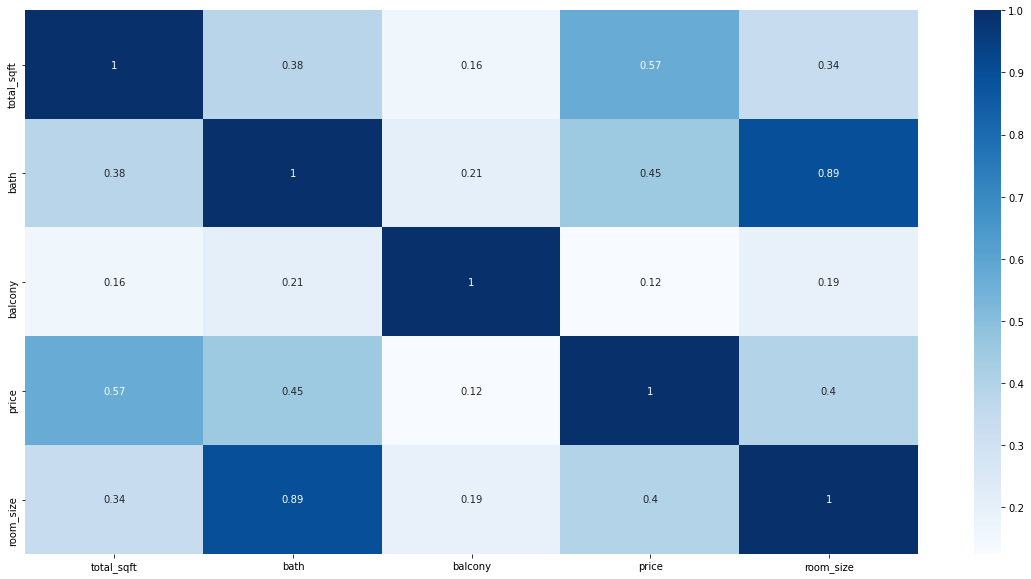

In [4]:
# split the independent and dependent features
x = new_banglore_dataset.drop('price',axis = 1)
y = new_banglore_dataset['price']

class EDA:
    
    # relation between the features
    def correlation(self):
        plt.figure(figsize = (20,10))
        sns.heatmap(new_banglore_dataset.corr() , annot = True , cmap = 'Blues')
        
    # mean and variance of features    
    def mean_and_variance(self):
        for cols in new_banglore_dataset.columns:
            print('mean of the',cols ,':',new_banglore_dataset[cols].mean() , 'and', 
                  'median of the',cols,':',new_banglore_dataset[cols].median())
            print()
            
    # split the data in training and validation dataset
    def split_data(self):
        return train_test_split(x,y , test_size = 0.3 , random_state = 42)
        
E = EDA()
E.correlation()

print()

E.mean_and_variance()

train_x , test_x , train_y , test_y = E.split_data()

# create models for Random forest and Linear Regression

In [6]:
rfe_model = RandomForestRegressor()
lin_model = LinearRegression()
class model_prediction:
    
    # Randomforestregressor
    def fit_the_model_for_rfr(self):
        rfe_model.fit(train_x,train_y)
        self.predict_rfe = rfe_model.predict(train_x)
    
    # Randomforestregressor result
    def accuracy_for_rfr(self):
        self.fit_the_model_for_rfr()
        rscore = r2_score(train_y,self.predict_rfe)
        mse = mean_squared_error(train_y,self.predict_rfe)
        return rscore , mse
    
    # Linear Regression
    def fit_the_model_for_rge(self):
        lin_model.fit(train_x,train_y)
        self.predict_lin = lin_model.predict(train_x)
        
     # Linear Regression result
    def accuracy_for_rge(self):
        self.fit_the_model_for_rge()
        rscore_rge = r2_score(train_y,self.predict_lin)
        mse_rge = mean_squared_error(train_y,self.predict_lin)
        return rscore_rge , mse_rge
    
    
m = model_prediction()
print('result for Random Forest')
total_sd , tota_error = m.accuracy_for_rfr()
print('total variation explained by the training model : ',total_sd ,'and', 'total error : ',tota_error)
print()
print('result for Linear Regression')
total_sd_rge , tota_error_rge = m.accuracy_for_rge()
print('total variation explained by the training model : ',total_sd_rge ,'and' ,'total error : ',tota_error_rge)


result for Random Forest
total variation explained by the training model :  0.8823858963582029 and total error :  2570.1116868431022

result for Linear Regression
total variation explained by the training model :  0.35236607200201253 and total error :  14152.142265293875


# Conclusion

as we can see Random Forest works better than linear regression as Random Forest dosen't require Feature scaling. we can increase the accuracy more by hyperparameter optimization techniques . However model diagnostics may cause problems as both the algorithms have a big problem of overfitting